In [67]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np

In [281]:
exps = [
    ["output_q=0.1_a=0.95_p=1_a_ratio=2_r_ratio=4", "output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.95_p=1_a_ratio=8_r_ratio=4"],
    ["output_q=0.1_a=0.9_p=1_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.99_p=1_a_ratio=4_r_ratio=4"],
    ["output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4+2"],
    ["output_q=0.01_a=0.95_p=1_a_ratio=4_r_ratio=2", "output_q=0.01_a=0.95_p=1_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=10"],
    ["output_q=0.01_a=0.95_p=1_a_ratio=4_r_ratio=non", "output_q=0.01_a=0.95_p=1_a_ratio=4_r_ratio=2", "output_q=0.01_a=0.95_p=1_a_ratio=4_r_ratio=4", "output_q=0.01_a=0.95_p=1_a_ratio=4_r_ratio=10"],
    ["output_q=0.01_a=0.95_p=1_a_ratio=4_r_ratio=4","output_q=0.05_a=0.95_p=1_a_ratio=4_r_ratio=4","output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4", "output_q=0.5_a=0.95_p=1_a_ratio=4_r_ratio=4"],
    ["output_scalability_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4"],
    ["output_q=0.1_a=0.95_p=0_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4"],
    ["output_q=0.1_a=0.9_p=1_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.99_p=1_a_ratio=4_r_ratio=4"],
    ["output_q=0.01_a=0.9_p=1_a_ratio=4_r_ratio=4", "output_q=0.01_a=0.95_p=1_a_ratio=4_r_ratio=4", "output_q=0.01_a=0.99_p=1_a_ratio=4_r_ratio=4"],
    ["output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4m=2", "output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4m=4"],
    ["output_q=0.1_a=0.9_p=1_a_ratio=4_r_ratio=4", "output_q=0.01_a=0.95_p=1_a_ratio=4_r_ratio=4","output_q=0.01_a=0.99_p=1_a_ratio=4_r_ratio=4"],
]

# exps = [
#     ["output_q=0.1_a=0.95_p=0_a_ratio=2_r_ratio=4", "output_q=0.1_a=0.95_p=0_a_ratio=4_r_ratio=4"],
#     ["output_q=0.1_a=0.9_p=0_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.95_p=0_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.99_p=0_a_ratio=4_r_ratio=4"],
#     ["output_q=0.1_a=0.95_p=0_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.95_p=0_a_ratio=4_r_ratio=4+2"],
#     ["output_q=0.1_a=0.95_p=0_a_ratio=4_r_ratio=2", "output_q=0.1_a=0.95_p=0_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.95_p=0_a_ratio=4_r_ratio=10"],
#     ["output_q=0.01_a=0.95_p=0_a_ratio=4_r_ratio=2", "output_q=0.01_a=0.95_p=0_a_ratio=4_r_ratio=4", "output_q=0.01_a=0.95_p=0_a_ratio=4_r_ratio=10"],
#     ["output_q=0.01_a=0.95_p=0_a_ratio=4_r_ratio=4","output_q=0.05_a=0.95_p=0_a_ratio=4_r_ratio=4","output_q=0.1_a=0.95_p=0_a_ratio=4_r_ratio=4","output_q=0.5_a=0.95_p=0_a_ratio=4_r_ratio=4"],
#     ["output_scalability"],
#     ["output_q=0.1_a=0.95_p=0_a_ratio=4_r_ratio=4", "output_q=0.1_a=0.95_p=1_a_ratio=4_r_ratio=4"],
# ]

exp_names = [
    "Different Initial Aggregation Ratios",
    "Increasing Error Bound",
    "Differing Step Function",
    "Different Data Reduction Factor (1%)",
    "Different Data Reduction Factor (0.1%)",
    "Increasing Initial Query Selectivity",
    "Scalability",
    "Prefetching",
    "SSIM",
    "Different Measures",
    "Data Reduction"]

dataset_names = {
    "intel_lab_exp": "INTL",
    "manufacturing_exp": "MNF",
    "soccer_exp": "SOCC"
}

exp_names = [
    "Aggregation Ratio",
    "Error Bound",
    "Step Function",
    "Data Reduction Factor",
    "Data Reduction Factor",
    "Query Selectivity",
    "Scalability",
    "Prefetching",
    "SSIM",
    "SSIM",
    "No. of Measures",
    "Data Reduction"]

labels = [
    ["Initial Agg. Ratio = 2", "Initial Agg. Ratio = 4"],
    ["Error Bound = 10%", "Error Bound = 5%", "Error Bound = 1%"],
    ["Step = X2", "Step = +2"],
    ["Data Reduction Factor = 2", "Raw Data Factor = 4", "Raw Data Factor = 10"],
    ["Data Reduction = OFF", "Data Reduction Factor = 2", "Raw Data Factor = 4", "Raw Data Factor = 10"],
    ["Initial Query Selectivity = 1%", "Initial Query Selectivity = 5%", "Initial Query Selectivity = 10%", "Initial Query Selectivity = 50%"],
    ["1M", "2M", "4M", "8M", "16M", "32M", "64M", "128M", "256M", "512M", "1B"],
    ["OFF", "ON"],
    [""],
    [""],
    ["1", "2", "4"],
    [""],
]

labels = [
    ["2", "4", "8"],
    ["10%", "5%", "1%"],
    ["X2", "+2"],
    ["2", "4", "10"],
    ["OFF", "2", "4", "10"],
    ["1%", "5%", "10%", "50%"],
    ["1M", "2M", "4M", "8M", "16M", "32M", "64M", "128M", "256M", "512M", "1B"],
    ["OFF", "ON"],
    ["10%", "5%", "1%"],
    ["10%", "5%", "1%"],
    ["1", "2", "4"],
    []
]

time_exps = [
            0,
            1, 
            2, 
            3,
            4,
            5,
            6,
            7,
            10,
           ]


ssim_exps = [
    8
]

dr_exps = [
    11
]

m4 = [
    ["m4-0.1", "m4-0.1"],
    ["m4-0.1", "m4-0.1", "m4-0.1", "m4-0.1"],
    ["m4-0.1", "m4-0.1"],
    ["m4-0.1", "m4-0.1", "m4-0.1"],
    ["m4-0.01", "m4-0.01", "m4-0.01", "m4-0.01"],
    ["m4-0.01", "m4-0.05", "m4-0.1", "m4-0.5"],
    [],
    ["m4-0.1", "m4-0.1"],
    ["m4-0.1"],
    ["m4-0.01"],
    ["m4-0.1"],
    ["m4-0.1"],
]
figsize = (7,3)

db = "influx"

In [282]:
dct = {
    'IO Count': 'mean',
    'Time (sec)': 'mean',
    'Query Time (sec)': 'mean',
    'Progressive Time (sec)': 'mean',
    'Memory': 'mean',
    'query #': 'mean',
    'width' : 'mean',
    'height' : 'mean',
    'aggFactor' : 'mean',
    'timeRange': lambda col: col.mode() if col.nunique() == 1 else np.nan,
    'from': 'mean',
    'to': 'mean',
    'Results size': lambda col: col.mode() if col.nunique() == 1 else np.nan,
    'Error': lambda col: col.mode() if col.nunique() == 1 else np.nan,
    'dataset': lambda col: col.mode() if col.nunique() == 1 else np.nan,
    'operation': lambda col: col.mode() if col.nunique() == 1 else np.nan,
    'flag': lambda col: col.mode() if col.nunique() == 1 else np.nan,
}

In [283]:
def get_experiment_dfs(exp_id, db='influx'):
    data = [f"{exp}/timeQueries/{db}/" for exp in exps[exp_id]]
    names = os.listdir(os.path.join(data[0]))
    if '.DS_Store' in names: names.remove('.DS_Store')
    runs = list(np.sort(os.listdir(os.path.join(data[0], names[0]))))
    if '.DS_Store' in runs: runs.remove('.DS_Store')
    results = ["ttiMinMaxResults"]
    results_paths = [os.path.join(d, name, run, result)  for name in names for d in data for result in results for run in runs  ]
    dfs_all = [pd.read_csv(os.path.join(df, "results.csv")) for df in results_paths]
    dfs = []
    for i in range(0, len(dfs_all), len(runs)):
        dds = dfs_all[i : i + len(runs)]
        d = dds[0]
        if(len(runs) > 1):
            for j in range(1, len(runs)):
                d = pd.concat((d, dds[j]))
            d = d.groupby(d.index).agg(**{k: (k, v) for k, v in dct.items()})
        dfs.append(d)
    return dfs, names

In [284]:
import math

def plot_time(dfs, name, exp_id):
    lbls = labels[exp_id]
    exp_name = exp_names[exp_id]

    plt.clf()
    sns.set(style="whitegrid")

    main_color = "seagreen"

    # Set a palette with more vibrant colors
    palette = sns.color_palette("Set2", n_colors=len(lbls))
    #sns.set_palette(palette)
    
    fig, axs = plt.subplots(1, 2, figsize=figsize, gridspec_kw={'width_ratios': [3, 1]}, constrained_layout=True)

    times = []
    for i in range(len(lbls)):
        time = dfs[i]["Query Time (sec)"]
        times.append(time)
        sns.lineplot(data=time, ax=axs[0], color=palette[i], label=lbls[i], linewidth=1, linestyle='-', alpha=0.8)

    axs[0].get_legend().remove()

    mean_matrix = []
    sum_matrix = []
    x_positions = []
    for i in range(len(lbls)):
        row1 = []
        row2 = []
        x_positions.append(i * (1 / len(lbls)))
        for j in range(len(lbls)):
            if i == j:
                row1.append(times[i].mean())
                row2.append(times[i].sum())
            else:
                row1.append(0)
                row2.append(0)
        mean_matrix.append(row1)
        sum_matrix.append(row2)

    for i in range(len(lbls)):
        sns.barplot(x=lbls, y=sum_matrix[i], ax=axs[1], color=palette[i], label=lbls[i])

    axs[1].set_xticklabels([])

    handles, _ = axs[1].get_legend_handles_labels()

    # Determine the number of columns for the legend
    num_cols = math.ceil(len(lbls) / 4)  # Adjust the maximum number of columns as needed
    num_rows = math.ceil(len(lbls) / num_cols)

    # Create a custom legend with boxes representing the patterns
    custom_legend = plt.legend(handles, lbls, bbox_to_anchor=(1, 0.6), frameon=False)
    # custom_legend = axs[0].legend(handles, lbls, bbox_to_anchor=(0.5, -0.3, 0, 0), ncol=num_cols, loc='lower center', frameon=False)

    plt.setp(custom_legend.get_title(), fontweight='bold')

    for ax in axs:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    axs[0].set_xlabel('Query', fontsize=12)
    axs[0].set_ylabel('Time (sec)', fontsize=12)
    axs[1].set_ylabel('Total Evaluation Time (sec)', fontsize=12)

    fig.subplots_adjust(bottom=0.2, wspace=0.3)

    plt.tight_layout()
    plt.savefig(f'times/{exp_name}_{name}.png'.replace("%", ""), dpi=300)
    plt.show()

def plot_time_only(dfs, name, exp_id):
    lbls = labels[exp_id]
    exp_name = exp_names[exp_id]

    plt.clf()
    sns.set(style="whitegrid")

    main_color = "seagreen"

    # Set a palette with more vibrant colors
    palette = sns.color_palette("Set2", n_colors=len(lbls))
    #sns.set_palette(palette)
    
    fig, axs = plt.subplots(1, 1, figsize=figsize, gridspec_kw={'width_ratios': [3]}, constrained_layout=True)

    times = []
    for i in range(len(lbls)):
        time = dfs[i]["Query Time (sec)"]
        times.append(time)
        sns.lineplot(data=time, ax=axs, color=palette[i], label=lbls[i], linewidth=1, linestyle='-', alpha=0.8)

    # axs[0].get_legend().remove()

    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)

    axs.set_xlabel('Query', fontsize=12)
    axs.set_ylabel('Time (sec)', fontsize=12)

    fig.subplots_adjust(bottom=0.2, wspace=0.3)

    plt.tight_layout()
    plt.savefig(f'times-only/{exp_name}_{name}.png'.replace("%", ""), dpi=300)
    plt.show()


def plot_single_time(dfs, name, exp_id):
    lbls = labels[exp_id]
    exp_name = exp_names[exp_id]

    plt.clf()
    sns.set(style="whitegrid")

    # Set a palette with more vibrant colors
    palette = sns.color_palette("Set2", n_colors=len(lbls))
    sns.set_palette(palette)

    fig, axs = plt.subplots(1, 1, figsize=figsize, gridspec_kw={'width_ratios': [3]}, constrained_layout=True)
    times = []
    for i in range(len(lbls)):
        time = dfs[i]["Query Time (sec)"]
        times.append(time)
    mean_matrix = []
    sum_matrix = []
    sum_times = []
    x_positions = []
    for i in range(len(lbls)):
        row1 = []
        row2 = []
        x_positions.append(i * (1 / len(lbls)))
        for j in range(len(lbls)):
            if i == j:
                row1.append(times[i].mean())
                sum_times.append(times[i].sum())
                row2.append(times[i].sum())
            else:
                row1.append(0)
                row2.append(0)
        mean_matrix.append(row1)
        sum_matrix.append(row2)
    x = np.array([1000000 * 2**i for i in range(11)])
    sum_times = np.array(sum_times)

    # Show only specific x-axis ticks
    x_axis_ticks = [10000000, 252000000, 512000000, 1000000000]
    x_axis_labels = ['10M', '252M', '512M', '1B']

    sns.lineplot(x=x, y=sum_times, marker='o', markersize=8, ax=axs, color=palette[i], label=lbls[i])

    axs.set_xticks(x_axis_ticks)
    axs.set_xticklabels(x_axis_labels)

    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)

    #axs.set_yscale('log')  # Set y-axis to logarithmic scale

    axs.set_ylabel('Total Evaluation Time (sec)', fontsize=12)
    axs.set_xlabel('Number of Data Points', fontsize=12)

    #fig.subplots_adjust(bottom=0.2, wspace=0.3)

    # Remove the legend
    axs.legend().set_visible(False)

    plt.tight_layout()
    plt.savefig(f'times-bars/{exp_name}_{name}.png'.replace("%", ""), dpi=300)
    plt.show()


In [285]:

def plot_single_bars(dfs, exp_id):
    datasets = [dataset_names[df['dataset'][0]] for df in dfs]
    datasets = np.unique(datasets)
    lbls = labels[exp_id]
    exp_name = exp_names[exp_id]
    n_experiments = len(dfs) // len(lbls)

    # Gather the Total Evaluation times in the desired format
    Total_Evaluation_times = []
    for i in range(0, len(dfs), len(lbls)):
        experiment_times = []
        for j in range(len(lbls)):
            time = dfs[i + j]["Query Time (sec)"]
            experiment_times.append(time.sum())
        Total_Evaluation_times.append(experiment_times)

    # Create a DataFrame to use seaborn's barplot
    data = pd.DataFrame(Total_Evaluation_times, columns=lbls)    
    data["Experiment"] = datasets

    # Melt the DataFrame to have the experiments as a categorical variable
    data_melted = pd.melt(data, id_vars="Experiment", var_name="Dataset", value_name="Total Evaluation Time (sec)")

    plt.clf()
    sns.set(style="whitegrid")
    main_color = "Set2"

    # Set a palette with more vibrant colors
    palette = sns.color_palette(main_color, n_colors=n_experiments)
    sns.set_palette(palette)

    fig, axs = plt.subplots(1, 1, figsize=figsize, gridspec_kw={'width_ratios': [3]}, constrained_layout=True)

    sns.barplot(x="Dataset", y="Total Evaluation Time (sec)", hue="Experiment", data=data_melted, palette=palette, ax=axs)

    axs.spines['top'].set_visible(False)
    axs.spines['right'].set_visible(False)

    axs.set_ylabel('Total Evaluation Time (sec)', fontsize=12)
    axs.set_xlabel(exp_names[exp_id], fontsize=12)

    fig.subplots_adjust(bottom=0.2, wspace=0.3)

    plt.tight_layout()
    plt.legend(title='Dataset')
    plt.savefig(f'times-bars/{exp_name}_experiment_{exp_id}.png'.replace("%", ""), dpi=300)  # Modified filename to include exp_id
    plt.show()


In [286]:
def convert_value(value):
    multipliers = {'m': 1e6, 'b': 1e9}  # Define the multipliers for 'm' and 'b'
    suffix = value[-1]  # Get the last character from the value (e.g., 'm', 'b')
    number = float(value.split('synthetic')[1][:-1])  # Get the numeric part of the value
    return number * multipliers.get(suffix, 1)  # Multiply the number by the corresponding multiplier

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

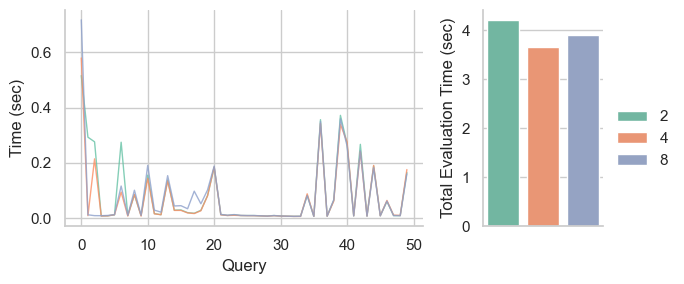

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

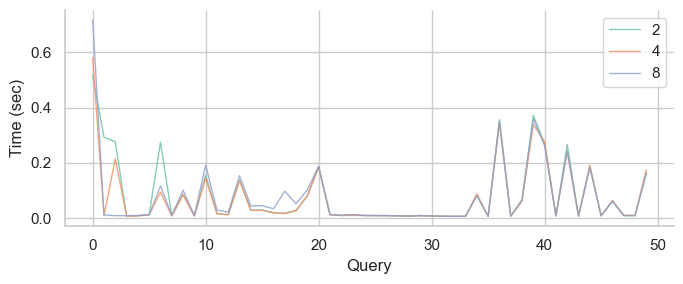

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

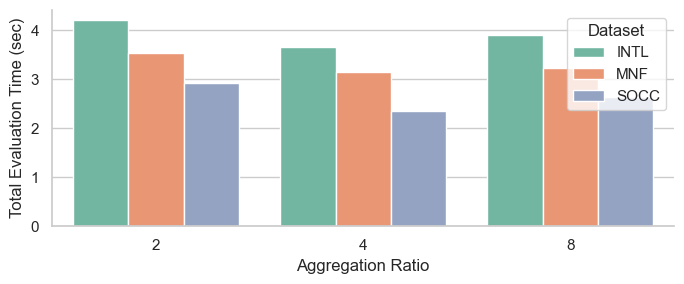

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

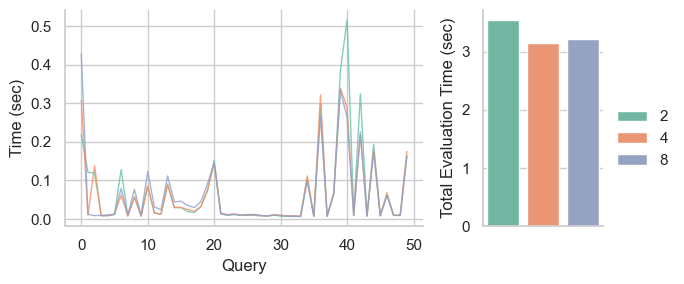

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

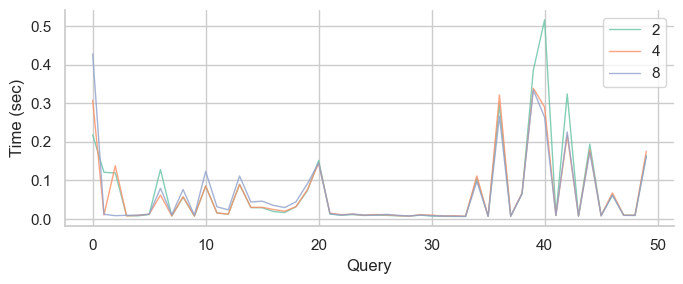

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

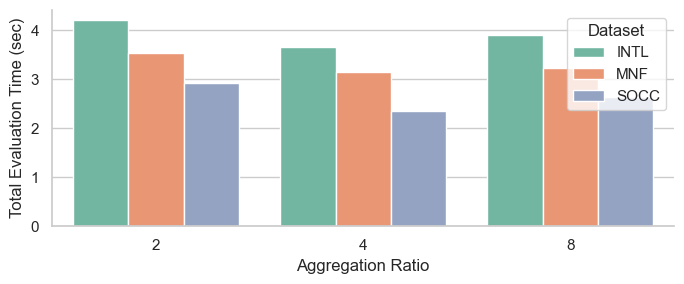

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

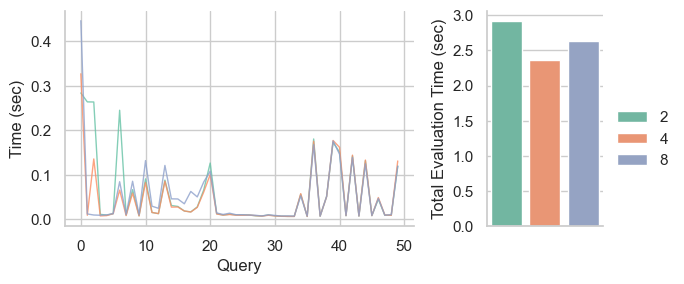

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

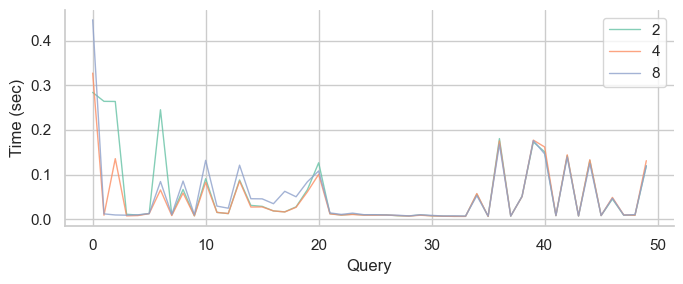

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

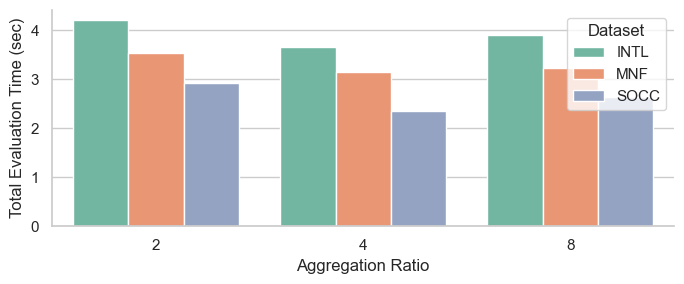

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

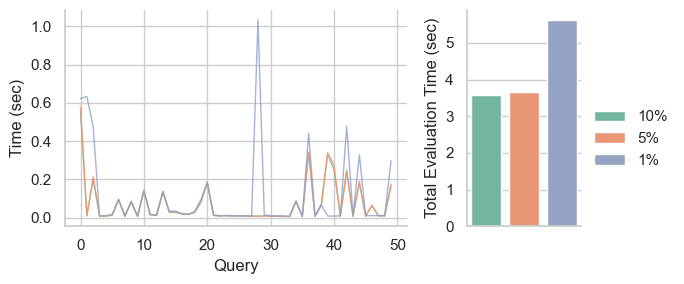

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

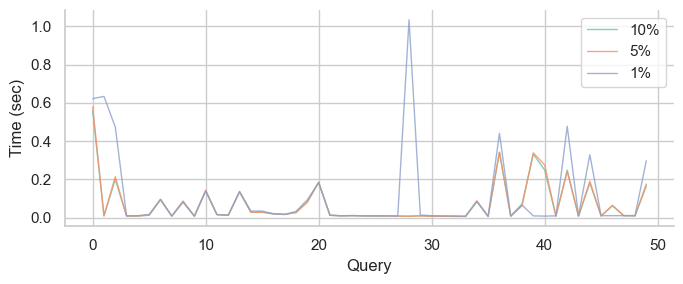

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

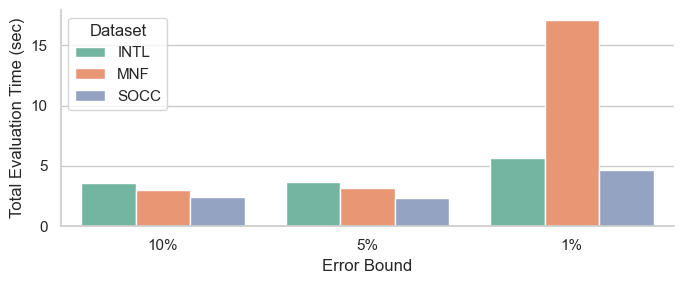

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

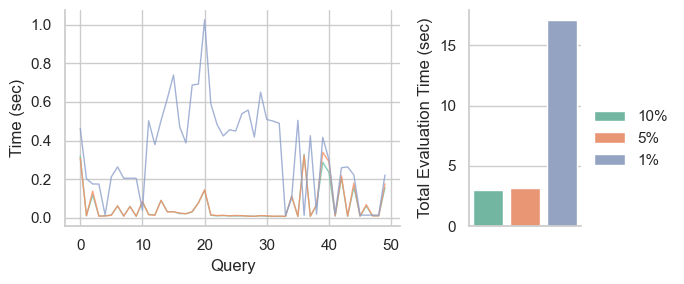

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

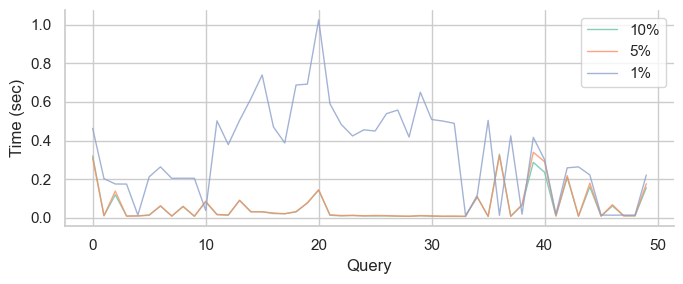

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

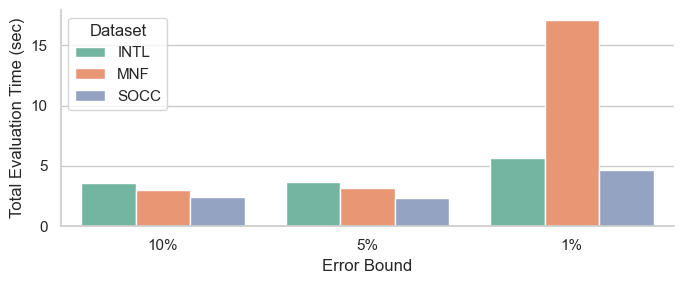

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

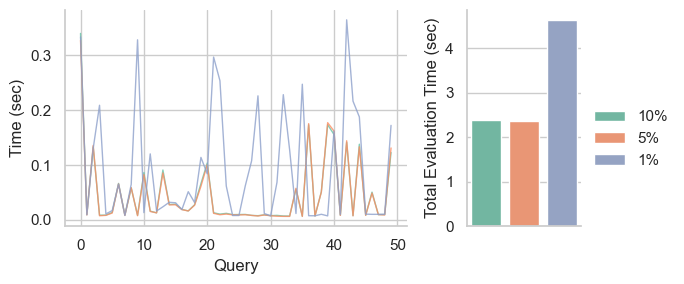

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

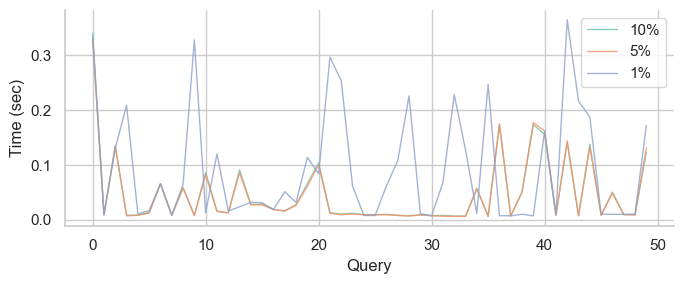

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

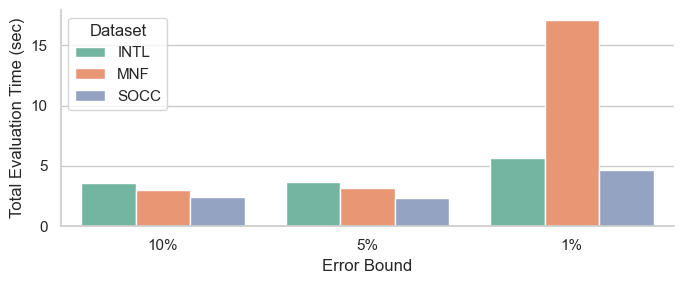

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

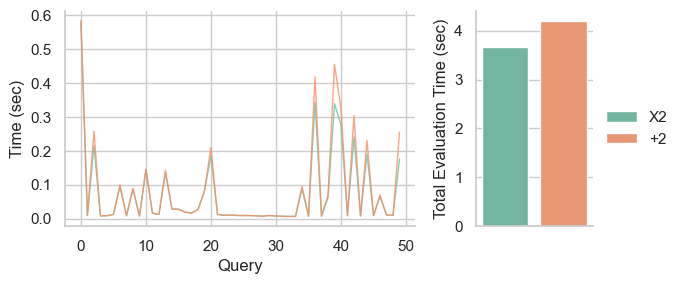

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

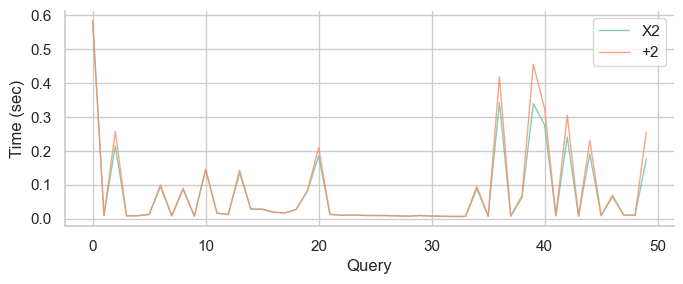

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

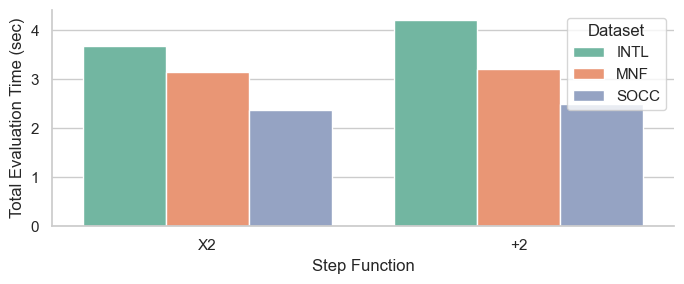

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

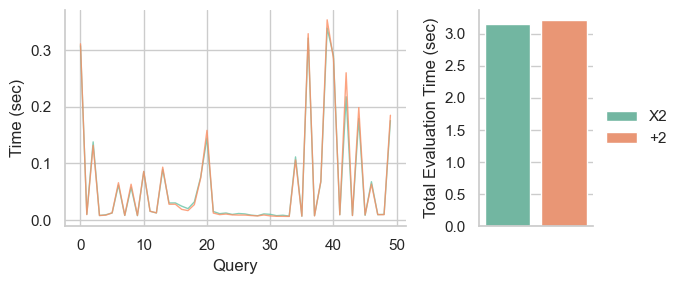

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

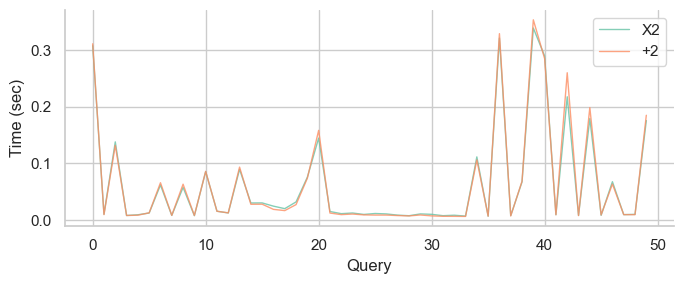

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

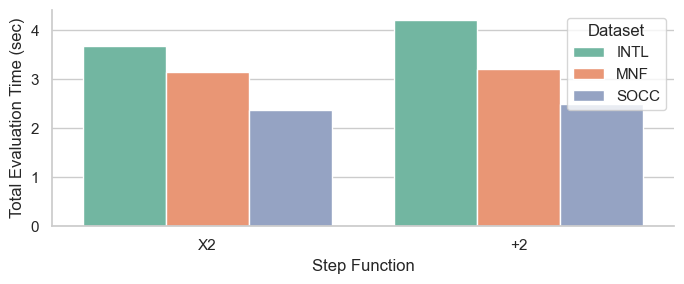

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

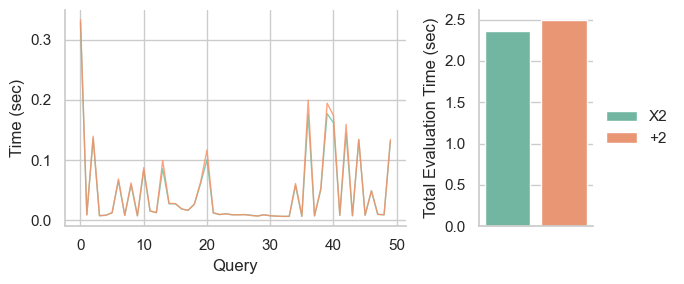

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

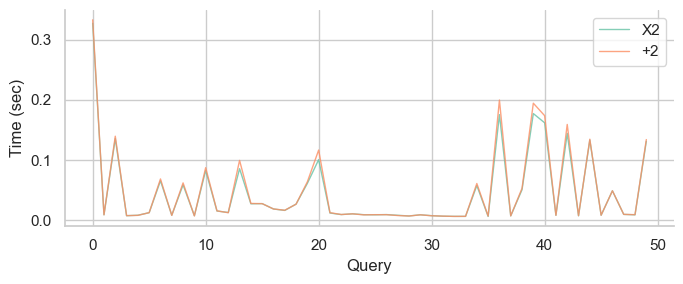

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

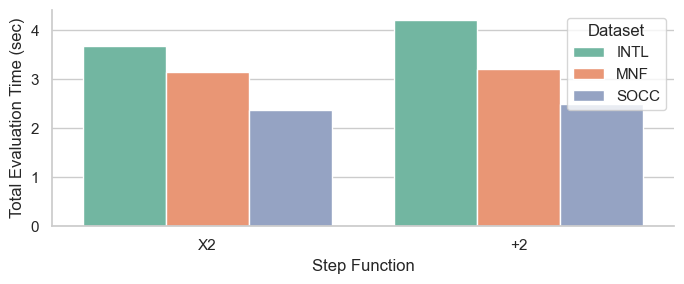

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

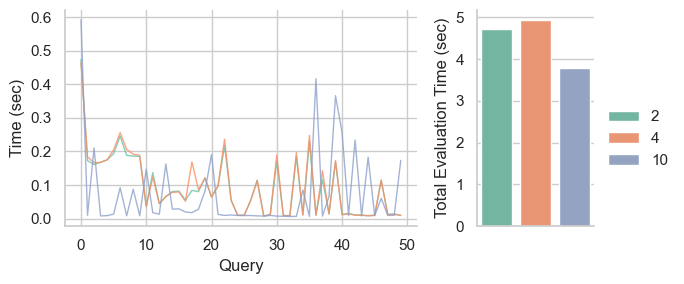

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

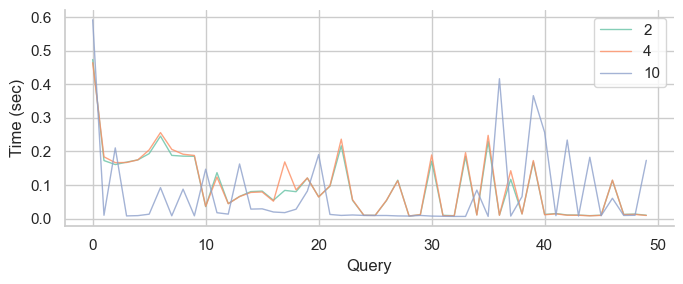

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

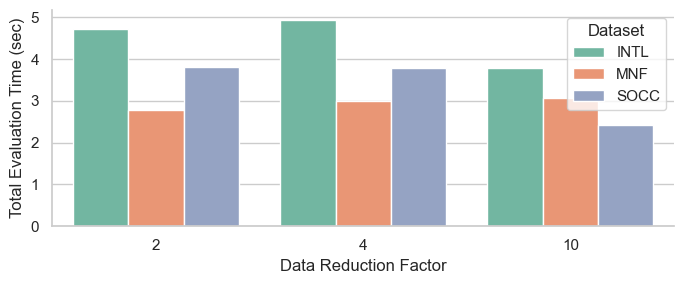

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

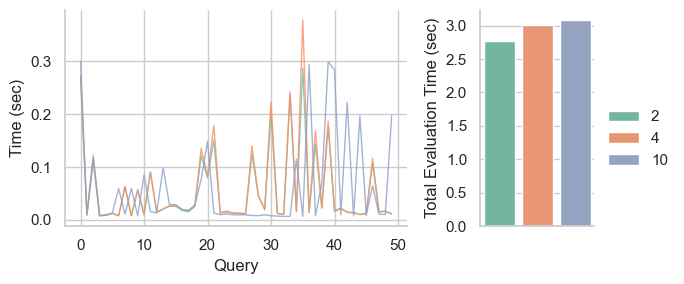

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

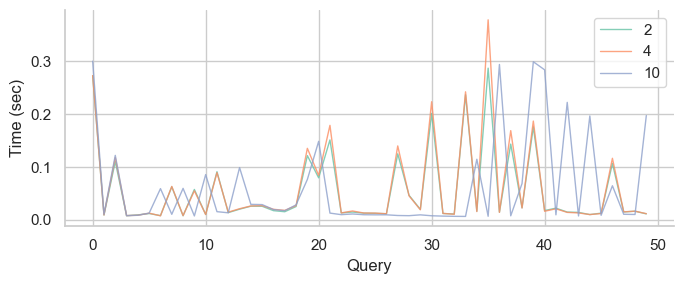

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

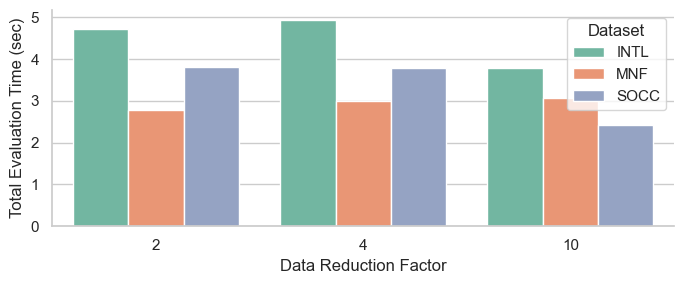

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

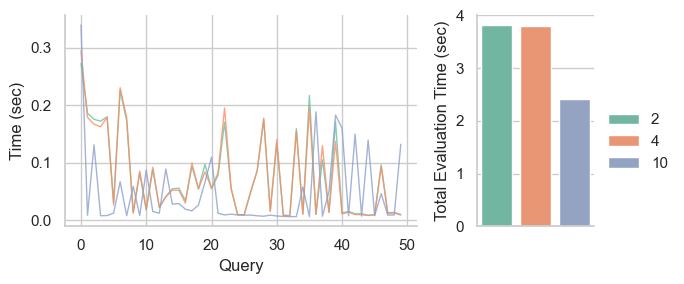

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

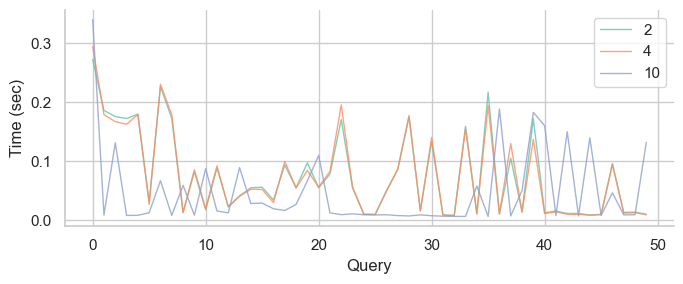

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

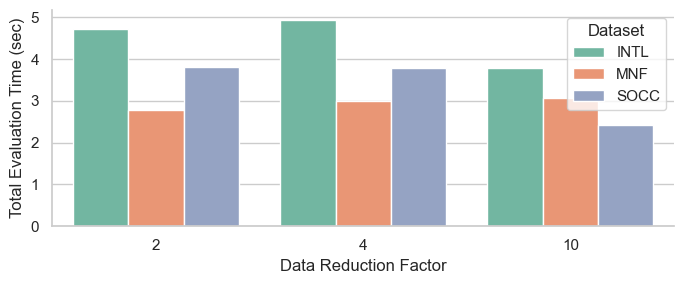

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

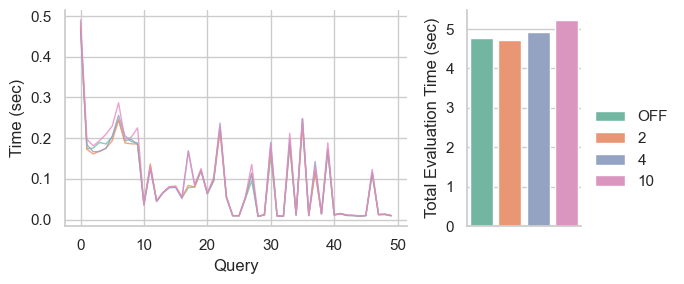

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

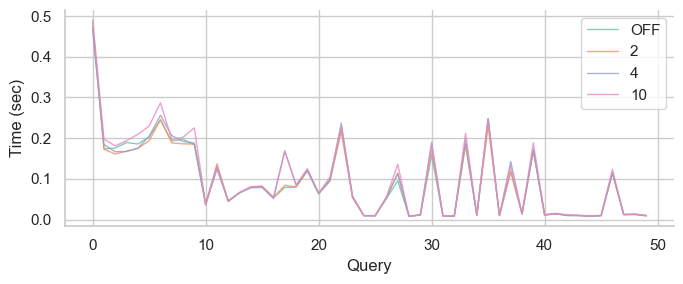

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

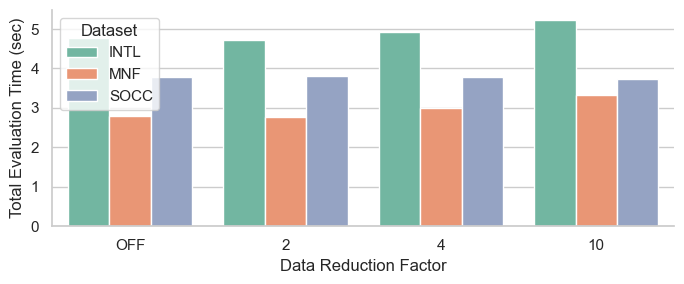

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

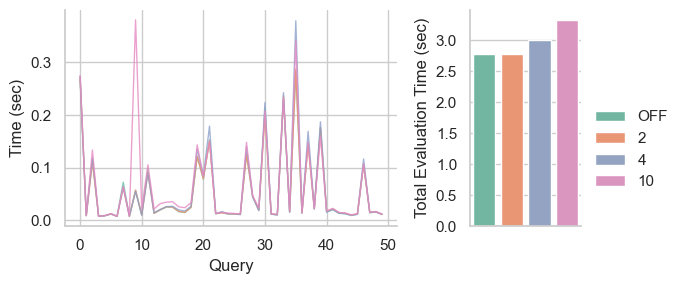

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

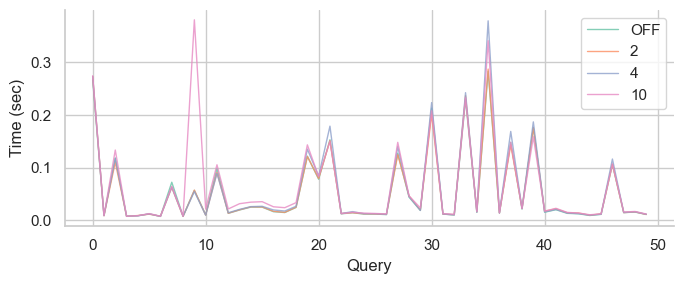

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

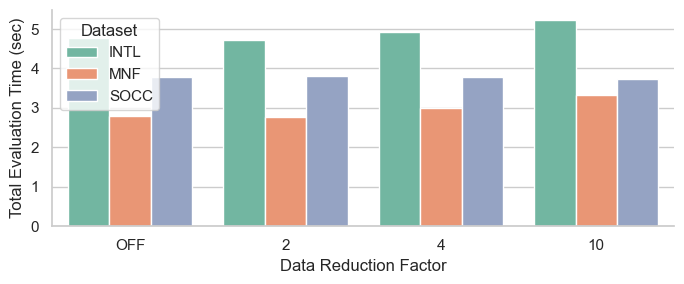

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

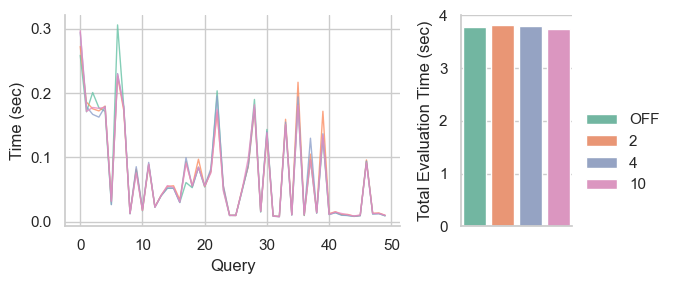

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

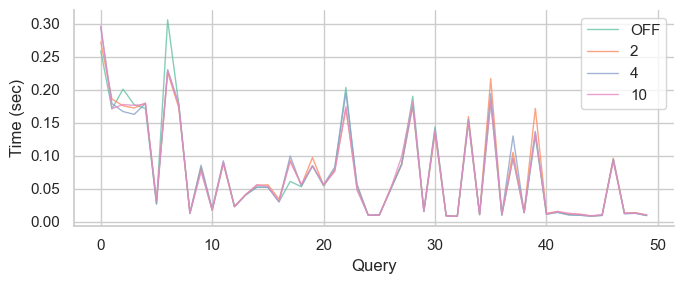

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

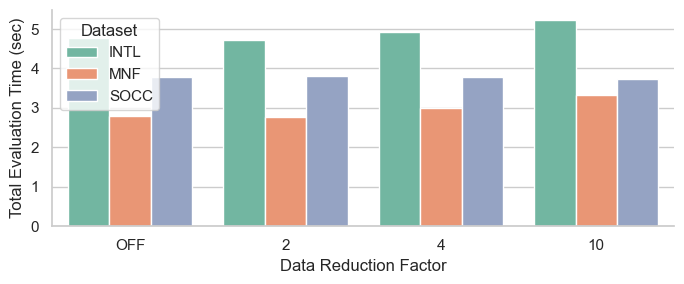

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

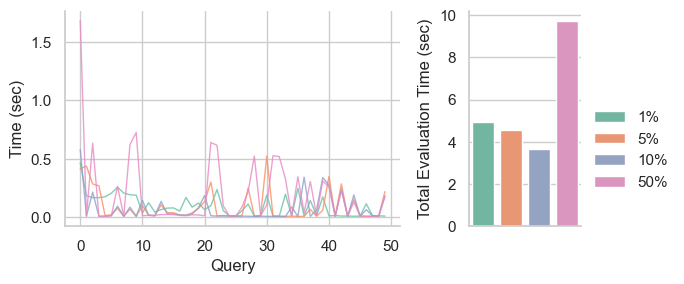

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

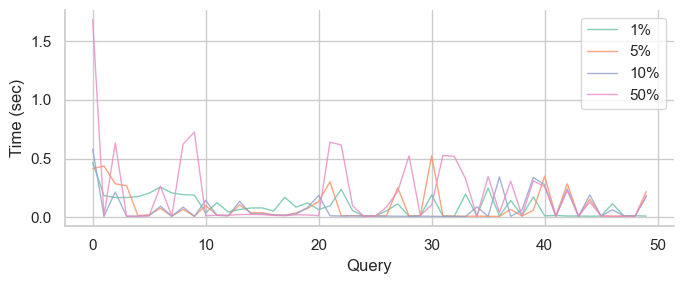

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

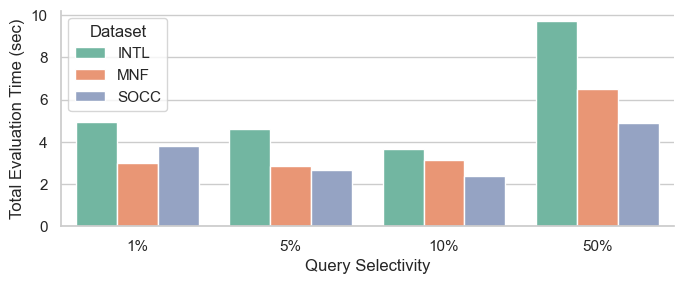

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

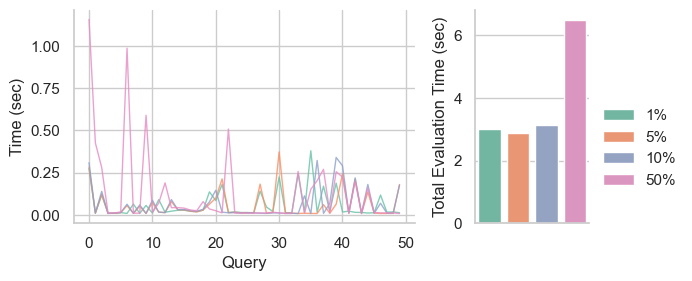

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

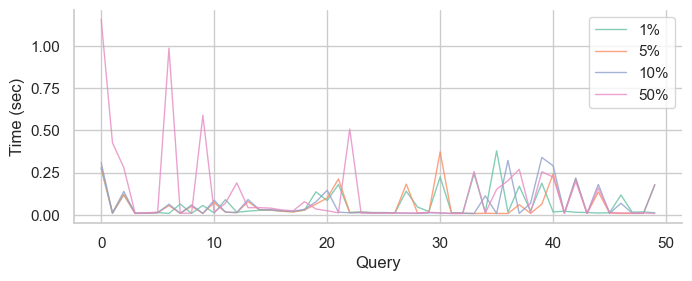

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

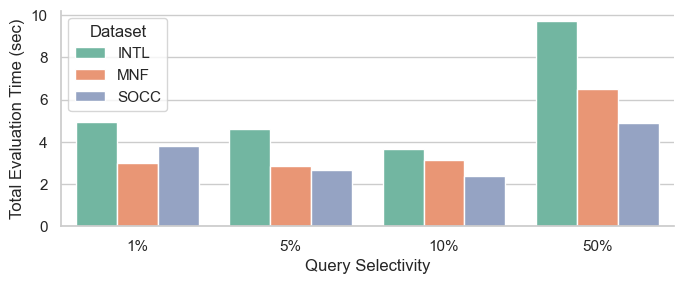

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

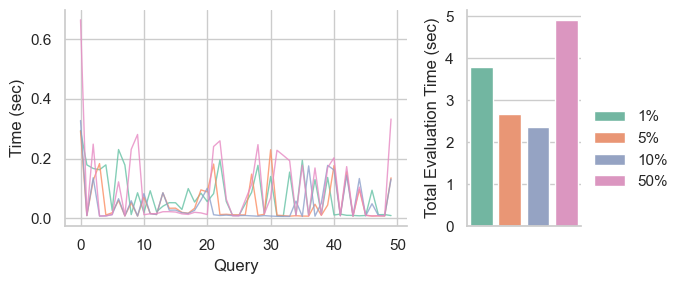

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

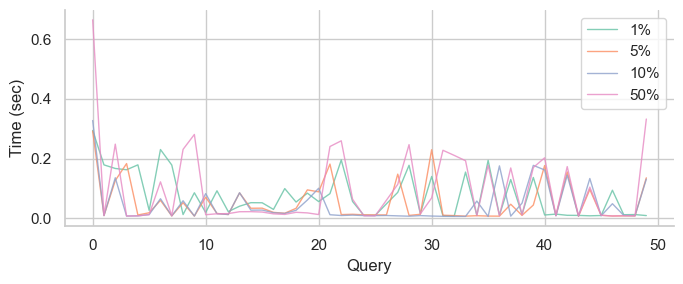

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

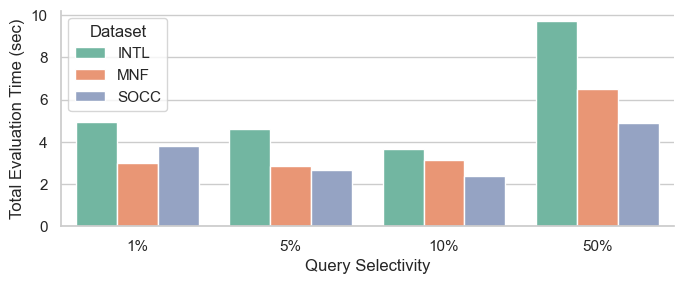

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:169: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

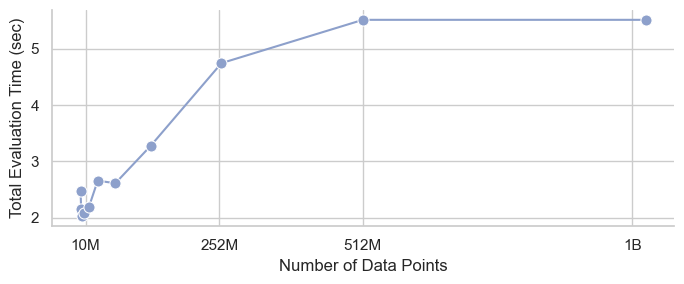

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

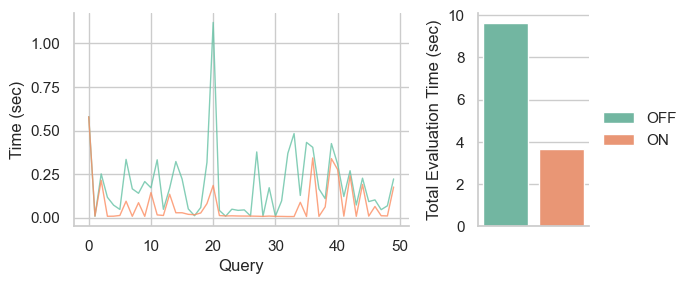

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

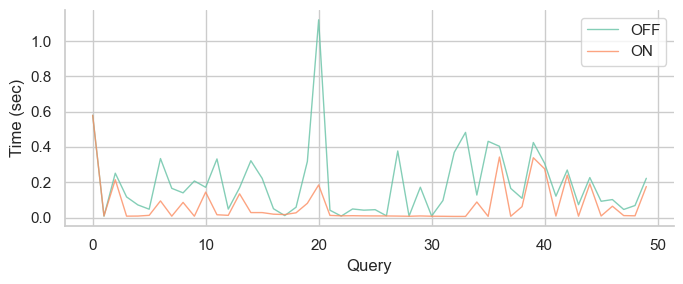

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

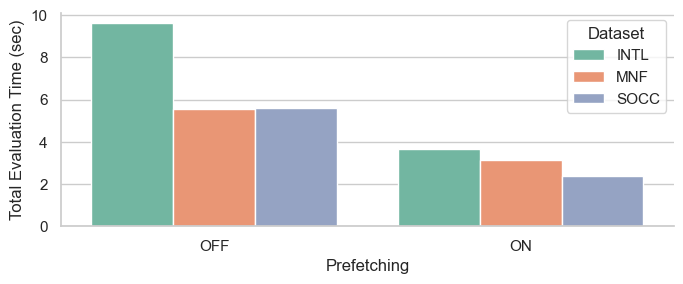

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

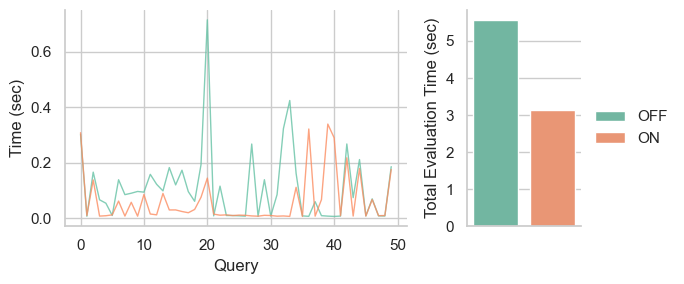

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

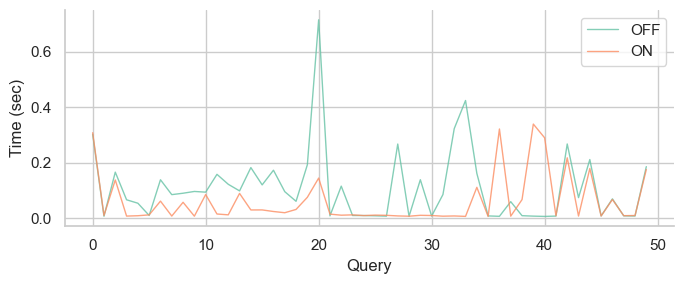

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

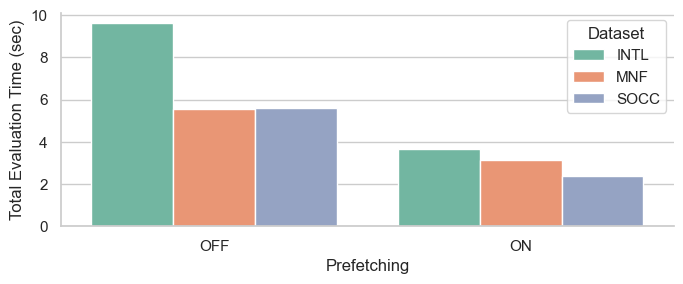

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

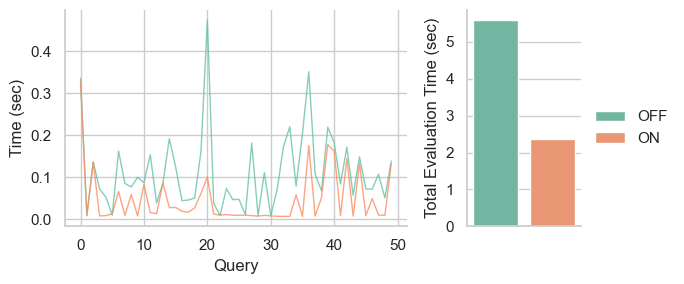

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

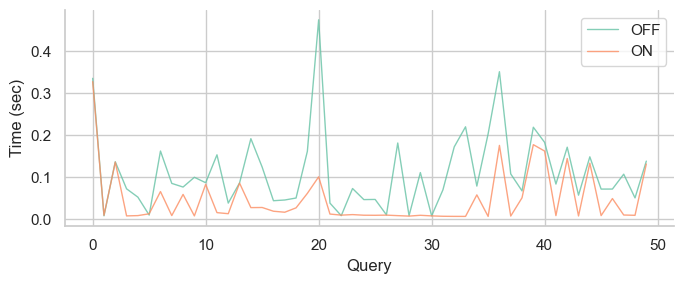

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

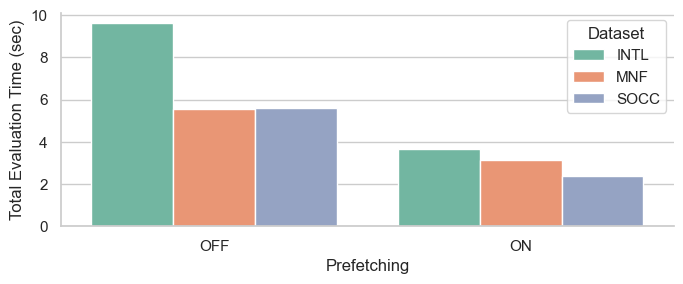

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

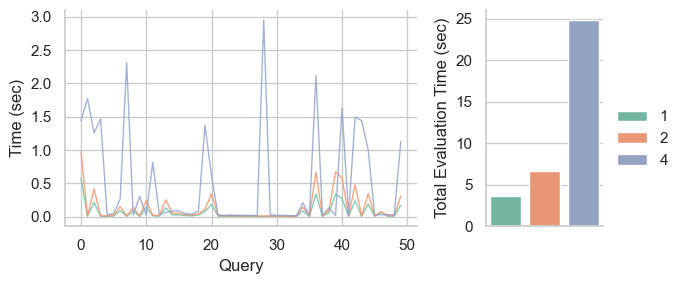

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

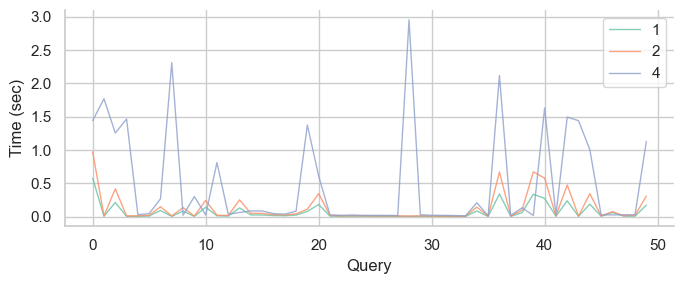

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

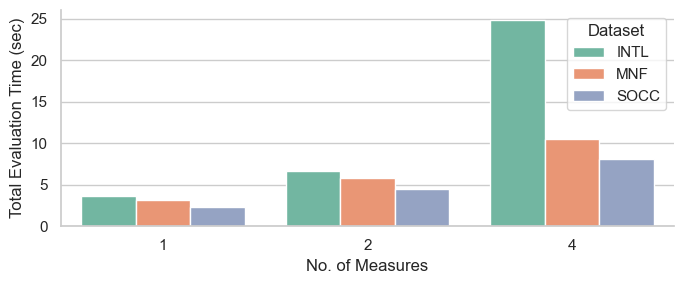

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

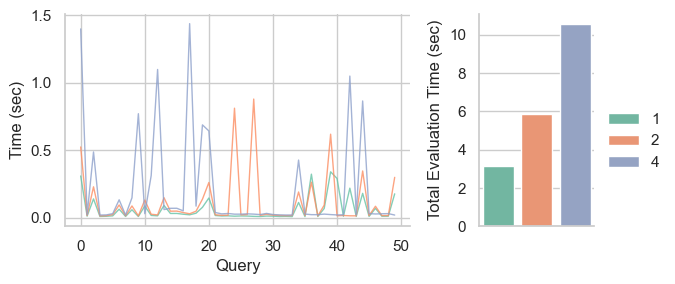

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

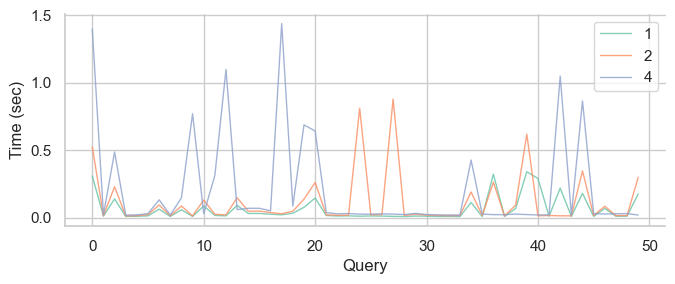

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

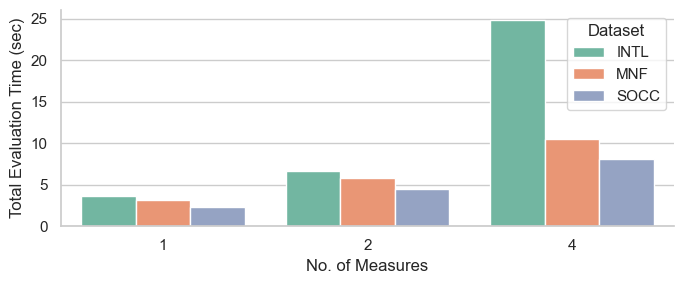

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:68: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:70: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

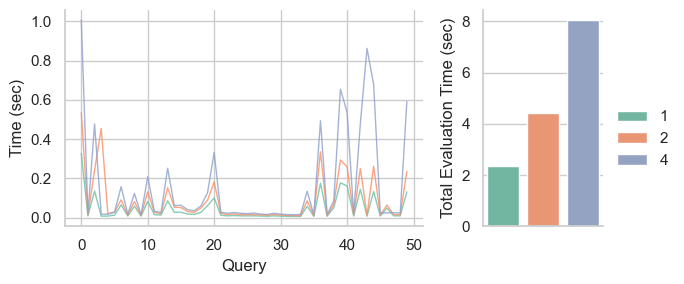

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:103: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1862662715.py:105: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

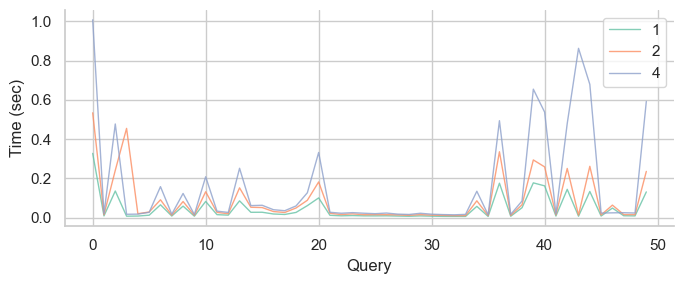

/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:42: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  fig.subplots_adjust(bottom=0.2, wspace=0.3)
/var/folders/cl/rlgfvqcj5bz8p2v_8qkjcb500000gn/T/ipykernel_1735/1756734168.py:44: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

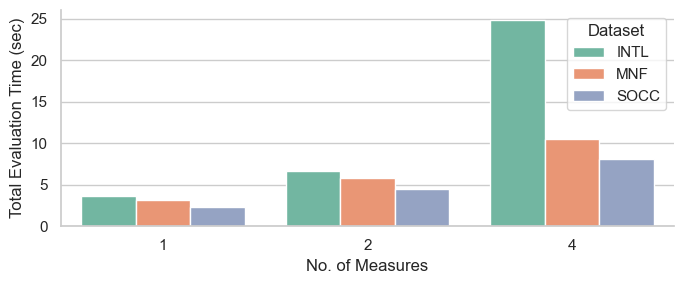

In [287]:
for exp_id in time_exps:
    j = 0
    k = 0
    dfs, names = get_experiment_dfs(exp_id, 'influx')
    if(exp_id == 6):
        sorted_dataframes = sorted(dfs, key=lambda df: convert_value(df['dataset'][0]))
        plot_single_time(sorted_dataframes, "synthetic", exp_id)
    else:
        for i in range(0, len(dfs), len(labels[exp_id])):
            plot_time(dfs[i : i + len(exps[exp_id])], names[j % len(names)], exp_id)
            plot_time_only(dfs[i : i + len(exps[exp_id])], names[j % len(names)], exp_id)
            plot_single_bars(dfs, exp_id)
            j +=1

In [127]:
from skimage import io, color
from skimage.metrics import structural_similarity as compare_ssim
import cairo

def plot(df, measure, name, width, height, queryFrom, queryTo):
    # Define the surface and the context
    surface = cairo.ImageSurface(cairo.FORMAT_ARGB32, width, height)
    ctx = cairo.Context(surface)
    
    ctx.set_antialias(cairo.Antialias.NONE)
    # Clear the background (white)
    ctx.set_source_rgb(1, 1, 1)
    ctx.paint()
    
    # Transform coordinate system so that (0,0) is the bottom left
    ctx.translate(0, height)
    ctx.scale(1, -1)
    
    # Plot the line (black)
    ctx.set_source_rgb(0, 0, 0)  # color
    ctx.set_line_width(1)  # line width
    
    pixelInterval = (queryTo - queryFrom) // width
    # Move to the first point
    ctx.move_to(
        np.floor((df['timestamp'].iloc[0] - queryFrom) / pixelInterval), 
        np.floor(height * ((df[measure].iloc[0] - df[measure].min()) / (df[measure].max() - df[measure].min())))
    )

    # Add lines to subsequent points
    for i in range(1, len(df)):
        ctx.line_to(
            np.floor((df['timestamp'].iloc[i] - queryFrom) / pixelInterval), 
            np.floor(height * ((df[measure].iloc[i] - df[measure].min()) / (df[measure].max() - df[measure].min())))
        )

    ctx.stroke()  # Apply the stroke
    
    # Save to a file
    surface.write_to_png(name + '.png')

    
    
def calculate_ssim(image_file1, image_file2, width, height):
    # Read the two images
    image1 = io.imread(image_file1)
    image2 = io.imread(image_file2)
    # Remove the alpha channel if present
    if image1.shape[2] == 4:
        image1 = image1[:, :, :3]
    if image2.shape[2] == 4:
        image2 = image2[:, :, :3]
    
    image1_gray = color.rgb2gray(image1)
    image2_gray = color.rgb2gray(image2)
    
    (score, _) = compare_ssim(image1_gray, image2_gray, full=True)
    # print(f"SSIM between {image_file1} and {image_file2}: {ssim_index:.4f}")
    diff = image1_gray - image2_gray
    # Search for all pixels that are different 
    # Type is <class 'numpy.ndarray'>, you can optionally convert to a list
    coords = np.argwhere(diff != 0)
    coords = coords.tolist() 
    return score, len(coords)/(width*height)


def get_mean_error(s, measures):
    a = (s.split("="))
    errs = []
    for l in a:
        if ("," in l):
            errs.append(float(l.split(",")[0]))
    errs.append(float(a[-1].split(",")[0][:-1]) * 100)
    return np.mean(errs)
    
    
def plot_indexes(df1, name, exp_id):
    exp_name = exp_names[exp_id]
    lbls = labels[exp_id]


    fig, axs = plt.subplots(1, 1, figsize=(10, 8))

    tti_paths = os.path.join(exps[exp_id][0], "timeQueries", db, name, "run_0", "ttiMinMaxResults") 
    m4_paths = os.path.join(m4[exp_id][0], "timeQueries", db, name, "run_0", "m4Results")

    queries = 50
    palette = sns.color_palette("tab10", n_colors=len(lbls))
    tti_query_0 = os.path.join(tti_paths, "query_0")
    sql_query_0 = os.path.join(m4_paths, "query_0") 

    meassure_files = os.listdir(tti_query_0)
    measures = [x.replace(".csv", "") for x in meassure_files]   
    tti_path1 = tti_paths
    m4_path = m4_paths
    errors1 = df1['Error'].apply(get_mean_error, args=([measures]))
    ssims = []
    diffs = []
    for n in range(queries):
        q = f"query_{n}"
        j = 0
        ssim1 = 0
        diffs1 = 0
        for m in meassure_files:
            path_tti1 = os.path.join(tti_path1, q)
            path_sql = os.path.join(m4_path, q)

            df_tti1 = pd.read_csv(os.path.join(path_tti1, m))
            df_m4 = pd.read_csv(os.path.join(path_sql, m))
            width = int(df1['width'][0])
            height = int(df1['height'][0])
            queryFrom = int(df1['from'][n])
            queryTo = int(df1['to'][n])
            plot(df_tti1, measures[j], f"plots/{name}-{q}-{measures[j]}-tti1",width,height, queryFrom, queryTo)
            plot(df_m4, measures[j], f"plots/{name}-{q}-{measures[j]}-m4", width, height, queryFrom, queryTo)
            score1, diff1 = calculate_ssim(f"plots/{name}-{q}-{measures[j]}-tti1.png", f"plots/{name}-{q}-{measures[j]}-m4.png", width, height)
            ssim1 += score1
            diffs1 += diff1
            j+=1  
                
        avg_ssim1 = ssim1 / len(measures)
        avg_diff1 = diffs1 / len(measures)
        ssims.append(avg_ssim1)
        diffs.append(avg_diff1)
        
    errors1 = np.array(errors1)
    diffs = np.array(diffs)
    # indices = np.where(diffs > errors1)
        
    axs.plot(ssims, label=f"SSIM", linewidth=2.5, color=palette[0], linestyle="--", marker = "o")
    axs.plot(diffs, label=f"Difference", linewidth=2.5, color=palette[0])
    axs.plot(errors1, label=f"Max Error", linewidth=2.5, linestyle="--")
        
    # Remove spines
    sns.despine()

    # Set x-axis ticks
    axs.set_xticks([0, 10, 20, 30, 40, 50])
    # Set x-axis tick labels as 'query_{q}'
    #axs.set_xticklabels([f'{i}:{dfs[0].operation[i]}' for i in range(len(df1))], rotation=45)
        
    # Legend adjustments
    handles, l = axs.get_legend_handles_labels()
    #custom_legend = plt.legend(handles, l, loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False)
    custom_legend = plt.legend(handles, l, bbox_to_anchor=(0.5, -0.1, 0, 0), ncol=3, loc='lower center', frameon=False)

    plt.savefig(f'ssims/{exp_name}_{name}.png'.replace("%", ""), dpi=300)  # Adjust the filename and DPI as needed

    plt.show()
    


In [128]:

def get_indexes(df1, name, exp_id, idx):
    exp_name = exp_names[exp_id]
    lbls = labels[exp_id]
    
    fig, axs = plt.subplots(1, 1, figsize=(10, 8))

    tti_paths = os.path.join(exps[exp_id][idx], "timeQueries", db, name, "run_0", "ttiMinMaxResults") 
    m4_paths = os.path.join(m4[exp_id][0], "timeQueries", db, name, "run_0", "m4Results")
    queries = 50
    palette = sns.color_palette("tab10", n_colors=len(lbls))
    tti_query_0 = os.path.join(tti_paths, "query_0")
    sql_query_0 = os.path.join(m4_paths, "query_0") 

    meassure_files = os.listdir(tti_query_0)
    measures = [x.replace(".csv", "") for x in meassure_files] 
    measures = ["2"]
    tti_path1 = tti_paths
    m4_path = m4_paths
    #errors1 = df1['Error'].apply(get_mean_error, args=([measures]))
    ssims = []
    diffs = []
    for n in range(queries):
        q = f"query_{n}"
        j = 0
        ssim1 = 0
        diffs1 = 0
        for m in measures:
            path_tti1 = os.path.join(tti_path1, q)
            path_sql = os.path.join(m4_path, q)
            df_tti1 = pd.read_csv(os.path.join(path_tti1, m + ".csv"))
            df_m4 = pd.read_csv(os.path.join(path_sql, m + ".csv"))
            width = int(df1['width'][0])
            height = int(df1['height'][0])
            queryFrom = int(df1['from'][n])
            queryTo = int(df1['to'][n])
            plot(df_tti1, measures[j], f"plots/{name}-{q}-{m}-tti1",width,height, queryFrom, queryTo)
            plot(df_m4, measures[j], f"plots/{name}-{q}-{m}-m4", width, height, queryFrom, queryTo)
            score1, diff1 = calculate_ssim(f"plots/{name}-{q}-{m}-tti1.png", f"plots/{name}-{q}-{m}-m4.png", width, height)
            ssim1 += score1
            diffs1 += diff1
            j+=1  
                
        avg_ssim1 = ssim1 / len(measures)
        avg_diff1 = diffs1 / len(measures)
        ssims.append(avg_ssim1)
        diffs.append(avg_diff1)
    return ssims, diffs

In [129]:
import pickle

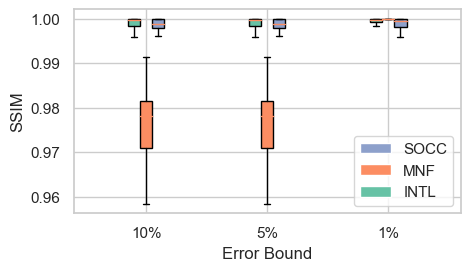

In [ ]:
all_ssim = []
for exp_id in ssim_exps:
    j = 0
    k = 0
    dfs, names = get_experiment_dfs(exp_id)
    for i in range(len(dfs)):
        j = i % len(names)
        name = dfs[i]['dataset'][0]
        file_name = f"ssims-0.1/ssim-{name}-{labels[exp_id][j]}"
        if(os.path.exists(file_name)):
            with open(file_name, "rb") as f:
                ssims = pickle.load(f)
        else:
            ssims, diffs = get_indexes(dfs[i], name, exp_id, j)
            with open(file_name, "wb") as f:
                pickle.dump(ssims, f)
        all_ssim.append(ssims)


def plot_barplot(data, y_label, x_label):
    # Split the data into three datasets
    datasets = [data[i:i + 3] for i in range(0, len(data), 3)]

    # Calculate the average and standard deviation for each error bound set within each dataset
    avg_times = []
    std_devs = []
    figsize=(5,3)
    cols = {
        0: 2,
        1: 1,
        2: 0
    }
    for dataset in datasets:
        avg_times_dataset = [np.mean(values) for values in dataset]
        std_devs_dataset = [np.std(values) for values in dataset]

        avg_times.append(avg_times_dataset)
        std_devs.append(std_devs_dataset)

    # Set Seaborn style and color palette
    sns.set(style="whitegrid", palette="Set2")
    
    # Create boxplots to visualize the average times with error bars representing the standard deviations
    error_bound_values = ['10%', '5%', '1%']
    datasets_names = ['SOCC', 'MNF', 'INTL']
    fig, ax = plt.subplots(figsize=figsize)
    for i, dataset_name in enumerate(datasets_names):
        bp = ax.boxplot(datasets[i], positions=np.arange(len(datasets[i])) + 0.1 * i, widths=0.1, patch_artist=True, showfliers=False)
        for box in bp['boxes']:
            box.set(facecolor=sns.color_palette("Set2")[i])
        #ax.errorbar(np.arange(len(datasets[i])) + 0.1 * i, avg_times[i], yerr=std_devs[i], fmt='.', color='k', capsize=5, markersize=5)

    # Add a legend with correct colors
    legend_boxes = [plt.Rectangle((0, 0), 1, 1, facecolor=sns.color_palette("Set2")[cols[i]]) for i in range(len(datasets_names))]
    ax.legend(legend_boxes, datasets_names)
    fig.subplots_adjust(bottom=0.2, wspace=0.1)

    # ax.set_title("Average SSIM")
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_xticks(np.arange(len(error_bound_values)) + 0.1)
    ax.set_xticklabels(error_bound_values)
    plt.savefig(f'ssims/{y_label}'.replace("%", ""), dpi=300, bbox_inches='tight')  # Adjust the filename and DPI as needed
    plt.show()
    
plot_barplot(all_ssim, "SSIM", "Error Bound")

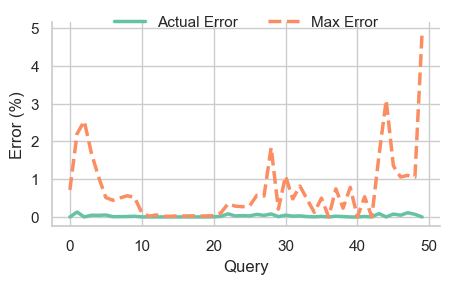

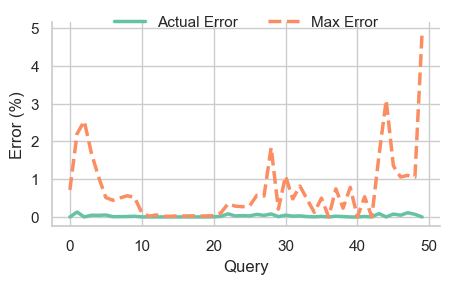

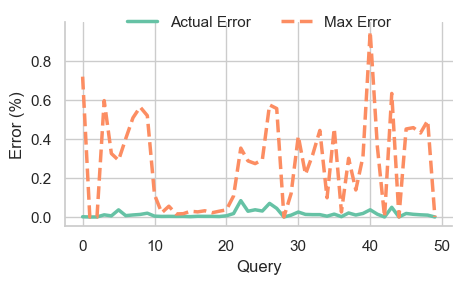

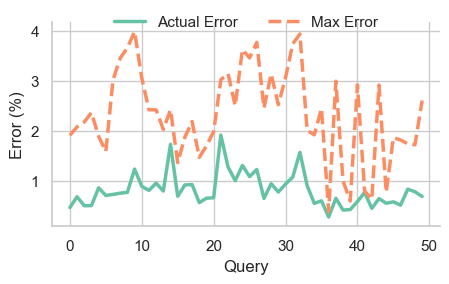

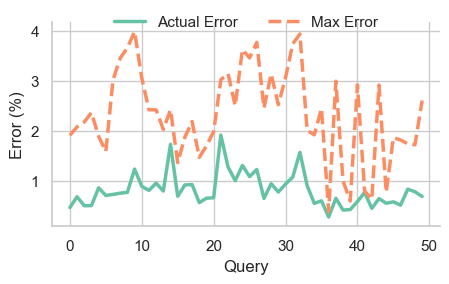

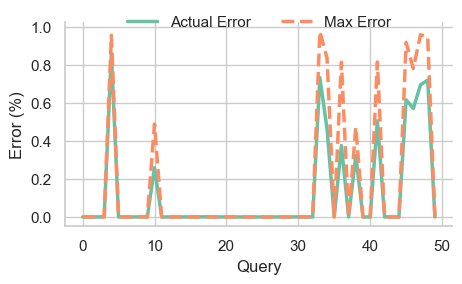

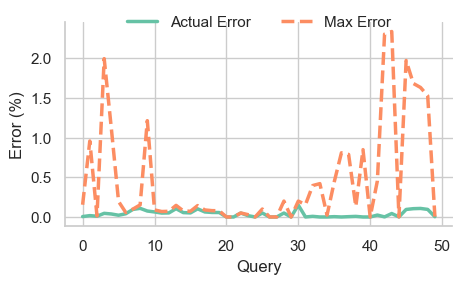

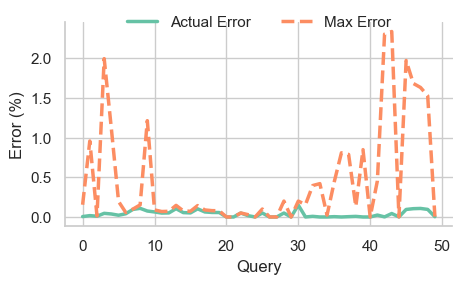

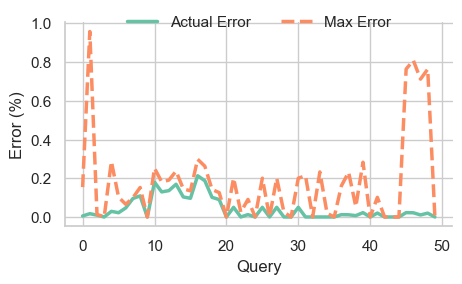

In [268]:
all_diff = []
def multiply_list_of_lists(lst_of_lists):
    if not lst_of_lists:
        return None

    result = []
    for inner_list in lst_of_lists:
        multiplied_inner_list = [num * 100 for num in inner_list]
        result.append(multiplied_inner_list)

    return result


def plot_indexes2(df1, data, name, exp_id, ll):
    exp_name = exp_names[exp_id]
    lbls = labels[exp_id]


    fig, axs = plt.subplots(1, 1, figsize=(5, 3))

    tti_paths = os.path.join(exps[exp_id][0], "timeQueries", db, name, "run_0", "ttiMinMaxResults") 
    m4_paths = os.path.join(m4[exp_id][0], "timeQueries", db, name, "run_0", "m4Results")

    queries = 50
    palette = sns.color_palette("Set2", n_colors=2)
    tti_query_0 = os.path.join(tti_paths, "query_0")
    sql_query_0 = os.path.join(m4_paths, "query_0") 

    meassure_files = os.listdir(tti_query_0)
    measures = [x.replace(".csv", "") for x in meassure_files]   
    tti_path1 = tti_paths
    m4_path = m4_paths
    errors1 = df1['Error'].apply(get_mean_error, args=([measures]))
    
    errors1 = np.array(errors1)
    data = np.array(data)
    indices = np.where(data > errors1)
    errors1[indices] = data[indices] * 1.4 
    
    #axs.plot(ssims, label=f"SSIM", linewidth=2.5, color=palette[0], linestyle="--", marker = "o")
    axs.plot(data, label=f"Actual Error", linewidth=2.5, color=palette[0])
    axs.plot(errors1, label=f"Max Error", linewidth=2.5, linestyle="--", color=palette[1])
   
    # Remove spines
    sns.despine()

    # Set x-axis ticks
    axs.set_xticks([0, 10, 20, 30, 40, 50])
    axs.set_xlabel("Query")
    axs.set_ylabel("Error (%)")
    # Set x-axis tick labels as 'query_{q}'
    #axs.set_xticklabels([f'{i}:{dfs[0].operation[i]}' for i in range(len(df1))], rotation=45)
    fig.subplots_adjust(bottom=0.2, wspace=0.1)


    # Legend adjustments
    handles, l = axs.get_legend_handles_labels()
    #custom_legend = plt.legend(handles, l, loc='center left', bbox_to_anchor=(1.02, 0.5), frameon=False)
    custom_legend = plt.legend(handles, l, bbox_to_anchor=(0.5, 1.1, 0, 0), ncol=2, loc='upper center', frameon=False)
    
    plt.savefig(f'diffs/{name}_{ll}.png'.replace("%", ""), dpi=300, bbox_inches='tight')  # Adjust the filename and DPI as needed


    plt.show()
    
for exp_id in ssim_exps:
    j = 0
    k = 0
    dfs, names = get_experiment_dfs(exp_id)
    for i in range(len(dfs)):
        j = i % len(names)
        name = dfs[i]['dataset'][0]
        file_name = f"diffs-0.1/diff-{name}-{labels[exp_id][j]}"
        if(os.path.exists(file_name)):
            with open(file_name, "rb") as f:
                diffs = pickle.load(f)
        else:
            ssims, diffs = get_indexes(dfs[i], name, exp_id, j)
            with open(file_name, "wb") as f:
                pickle.dump(diffs, f)
        diffs = np.array(diffs) * 100
        plot_indexes2(dfs[i], diffs, name, exp_id, labels[exp_id][j])
        all_diff.append(diffs)


#plot_barplot(multiply_list_of_lists(all_diff), "Average Pixel Difference (%)", "Error Bound")

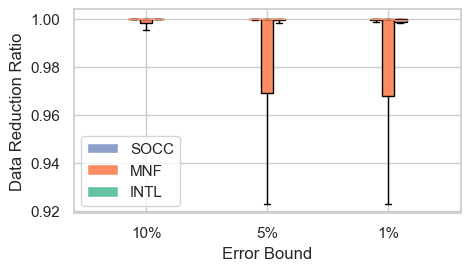

In [262]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
millis = {
        'soccer_exp': 500,
        'manufacturing_exp':100,
        'intel_lab_exp':30000
    }

def plot_data_reduction(dfs, names):
    # Initialize an empty DataFrame to store the aggregated data
    aggregated_df = pd.DataFrame()
   
    # Loop through each dataset and average them
    for df, name in zip(dfs, names):
        mult = millis[name]  # Get the corresponding multiplier from 'millis' based on the dataset
        df['raw'] = (df['to'] - df['from']) / mult
        df['Data Reduction'] = 1 - (df['IO Count'] / df['raw'])

        # If it's the first dataset, store it in the aggregated DataFrame
    
        # Add the 'Data Reduction' column to the aggregated DataFrame
        aggregated_df[dataset_names[name]] = df['Data Reduction']
    # Set the color palette to 'colorblind'
    sns.set_palette('colorblind')

    # Create the Seaborn boxplot for each dataset
    plt.figure(figsize=figsize)
    sns.boxplot(data=aggregated_df, palette='colorblind')
    plt.xlabel('Dataset')
    plt.ylabel('Data Reduction ratio')
    plt.title('Data Reduction by Dataset')
    plt.ylim(0.95, 1)
    plt.show()

# Assuming you have the 'millis' dictionary defined and 'dr_exps' contains the experiment IDs
for exp_id in dr_exps:
    dfs, names = get_experiment_dfs(exp_id)
    figsize=(5,3)


    # Initialize lists to store data for boxplots
    data_reduction_values = []
    error_values = []

    for i, df in enumerate(dfs):
        mult = millis[df['dataset'][0]]  # Get the corresponding multiplier from 'millis' based on the dataset
        df['raw'] = (df['to'] - df['from']) / mult
        df['Data Reduction'] = 1 - (df['IO Count'] / df['raw'])

        # Append data reduction values to the list
        data_reduction_values.append(df['Data Reduction'])
    
    # Split the data into three datasets
    datasets = [data_reduction_values[i:i + 3] for i in range(0, len(data_reduction_values), 3)]

    # Calculate the average and standard deviation for each error bound set within each dataset
    avg_times = []
    std_devs = []
    
    cols = {
        0: 2,
        1: 1,
        2: 0
    }
    for dataset in datasets:
        avg_times_dataset = [np.mean(values) for values in dataset]
        std_devs_dataset = [np.std(values) for values in dataset]

        avg_times.append(avg_times_dataset)
        std_devs.append(std_devs_dataset)

    # Set Seaborn style and color palette
    sns.set(style="whitegrid", palette="Set2")

    # Create boxplots to visualize the average times with error bars representing the standard deviations
    error_bound_values = ['10%', '5%', '1%']
    datasets_names = ['SOCC', 'MNF', 'INTL']
    fig, ax = plt.subplots(figsize=figsize)
    for i, dataset_name in enumerate(datasets_names):
        bp = ax.boxplot(datasets[i], positions=np.arange(len(datasets[i])) + 0.1 * i, widths=0.1, patch_artist=True, showfliers=False)
        for box in bp['boxes']:
            box.set(facecolor=sns.color_palette("Set2")[i])
        #ax.errorbar(np.arange(len(datasets[i])) + 0.1 * i, avg_times[i], yerr=std_devs[i], fmt='.', color='k', capsize=5, markersize=5)

    # Add a legend with correct colors
    legend_boxes = [plt.Rectangle((0, 0), 1, 1, facecolor=sns.color_palette("Set2")[cols[i]]) for i in range(len(datasets_names))]
    ax.legend(legend_boxes, datasets_names)
    fig.subplots_adjust(bottom=0.2, wspace=0.1)

    # ax.set_title("Average SSIM")
    ax.set_xlabel("Error Bound")
    ax.set_ylabel("Data Reduction Ratio")
    ax.set_xticks(np.arange(len(error_bound_values)) + 0.1)
    ax.set_xticklabels(error_bound_values)
    plt.savefig(f'ssims/data-reduction.png'.replace("%", ""), dpi=300,bbox_inches='tight')  # Adjust the filename and DPI as needed
    plt.show()